In [8]:
import numpy as np
from Tools.data_utils import load_CIFAR10

In [9]:
cifar10_dir = 'C:/Users/rainstar/Jupyter Folder/cs231n/cifar-10-batches-py/'

try:
    del X_train,Y_train
    del X_test,Y_test
    print('Clear previously loaded data')
except:
    pass

X_train,Y_train,X_test,Y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ',X_train.shape)
print('Training labels shape: ',Y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test labels shape: ',Y_test.shape)

Clear previously loaded data
Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


In [10]:
num_train = 49000
num_validation = 1000
num_test = 1000
num_dev =  500

mask = range(num_train,num_train+num_validation)
X_val = X_train[mask]
Y_val = Y_train[mask].astype('int')

mask = range(num_train)
X_train = X_train[mask]
Y_train = Y_train[mask].astype('int')

mask = range(num_test)
X_test = X_test[mask]
Y_test = Y_test[mask].astype('int')

mask = np.random.choice(num_train,num_dev,replace=True)
X_dev = X_train[mask]
Y_dev = Y_train[mask].astype('int')

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', Y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', Y_val.shape)
print('Test data shape: ', Y_test.shape)
print('Test labels shape: ', Y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000,)
Test labels shape:  (1000,)


In [11]:
# normalize
mean_image = np.mean(X_train,axis=0)

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

# append bias
X_train = np.hstack([X_train,np.ones((X_train.shape[0],1))])
X_val = np.hstack([X_val,np.ones((X_val.shape[0],1))])
X_test = np.hstack([X_test,np.ones((X_test.shape[0],1))])
X_dev = np.hstack([X_dev,np.ones((X_dev.shape[0],1))])

print('X_train: ',X_train.shape)
print('X_val: ',X_val.shape)
print('X_test: ',X_test.shape)
print('X_dev: ',X_dev.shape)

X_train:  (49000, 3073)
X_val:  (1000, 3073)
X_test:  (1000, 3073)
X_dev:  (500, 3073)


In [12]:
from Tools.classifiers.svm import svm_loss_naive
from Tools.classifiers.svm import svm_loss_vectorized

# 使参数尽量小
W = np.random.randn(3073,10)

loss1,grad1 = svm_loss_naive(W,X_dev,Y_dev,0.000005)
print('loss: ',loss1,)

loss2,grad2 = svm_loss_vectorized(W,X_dev,Y_dev,0.000005)
print('loss: ',loss2) 

loss:  18549.00010113086
loss:  18549.000101130867


In [14]:
from Tools.classifiers.linear_classifier import LinearSVM

# 训练
svm = LinearSVM()
loss_hist = svm.train(X_train,
                      Y_train,
                      learning_rate=1e-7,
                      regu=2.5e4,
                      num_iters=1500,
                      batch_size=200,
                      verbose=True)

iteration 0 / 1500 : loss 401.63439821772084
iteration 100 / 1500 : loss 239.2440752776986
iteration 200 / 1500 : loss 145.36324524912587
iteration 300 / 1500 : loss 89.50311199519909
iteration 400 / 1500 : loss 55.253429983803215
iteration 500 / 1500 : loss 36.25206376682971
iteration 600 / 1500 : loss 23.291333547320736
iteration 700 / 1500 : loss 16.4959037739525
iteration 800 / 1500 : loss 11.832050406291334
iteration 900 / 1500 : loss 9.082565213056576
iteration 1000 / 1500 : loss 7.741410436734223
iteration 1100 / 1500 : loss 6.133298943156444
iteration 1200 / 1500 : loss 6.316573717450265
iteration 1300 / 1500 : loss 5.2983128260763515
iteration 1400 / 1500 : loss 5.428221286421965


In [16]:
Y_train_pred = svm.predict(X_train)
print('train accuracy: ',np.mean(Y_train == Y_train_pred))

Y_val_pred = svm.predict(X_val)
print('validation accuracy: ',np.mean(Y_val == Y_val_pred))

train accuracy:  0.37334693877551023
validation accuracy:  0.371


In [17]:
# 超参验证

results = {}
best_val = -1
best_svm = None

learning_rates = [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]
regularizations = [1e4,2e4,3e4,4e4,5e4]

for lr in learning_rates:
    for reg in regularizations:
        svm = LinearSVM()
        svm.train(X_train,
                  Y_train,
                  learning_rate=lr,
                  regu=reg,
                  num_iters=1500,
                  batch_size=200,
                  verbose=False)
        Y_train_pred = svm.predict(X_train)
        Y_val_pred = svm.predict(X_val)
        acc = (np.mean(Y_train == Y_train_pred),
               np.mean(Y_val == Y_val_pred))
        results[(lr,reg)] = acc
        if(acc[1] > best_val):
            best_val = acc[1]
            best_svm = svm

print('best_val: ',best_val)
for lr,reg  in sorted(results):
    train_acc,val_acc = results[(lr,reg)]
    print('lr {} reg {} train_acc: {} val_acc: {}'
          .format(lr,reg,train_acc,val_acc))

C:\Users\rainstar\Jupyter Folder\cs231n\assignments\assignment1\Tools\classifiers\svm.py:59: RuntimeWarning: overflow encountered in double_scalars
  loss += 0.5 * regu * np.sum(W*W)
D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\rainstar\Jupyter Folder\cs231n\assignments\assignment1\Tools\classifiers\svm.py:59: RuntimeWarning: overflow encountered in multiply
  loss += 0.5 * regu * np.sum(W*W)
C:\Users\rainstar\Jupyter Folder\cs231n\assignments\assignment1\Tools\classifiers\svm.py:55: RuntimeWarning: overflow encountered in subtract
  margin = scores - correct_class_scores + 1   # (N,C)
C:\Users\rainstar\Jupyter Folder\cs231n\assignments\assignment1\Tools\classifiers\svm.py:55: RuntimeWarning: invalid value encountered in subtract
  margin = scores - correct_class_scores + 1   # (N,C)
C:\Users\rainstar\Jupyter Folder\cs231n\assignments\assignment1\Tools\class

best_val:  0.394
lr 1e-07 reg 10000.0 train_acc: 0.37565306122448977 val_acc: 0.377
lr 1e-07 reg 20000.0 train_acc: 0.3823061224489796 val_acc: 0.394
lr 1e-07 reg 30000.0 train_acc: 0.3773469387755102 val_acc: 0.389
lr 1e-07 reg 40000.0 train_acc: 0.37157142857142855 val_acc: 0.38
lr 1e-07 reg 50000.0 train_acc: 0.37389795918367347 val_acc: 0.38
lr 1e-06 reg 10000.0 train_acc: 0.29359183673469386 val_acc: 0.315
lr 1e-06 reg 20000.0 train_acc: 0.2866530612244898 val_acc: 0.289
lr 1e-06 reg 30000.0 train_acc: 0.31495918367346937 val_acc: 0.331
lr 1e-06 reg 40000.0 train_acc: 0.2738163265306122 val_acc: 0.272
lr 1e-06 reg 50000.0 train_acc: 0.2931020408163265 val_acc: 0.304
lr 1e-05 reg 10000.0 train_acc: 0.20661224489795918 val_acc: 0.208
lr 1e-05 reg 20000.0 train_acc: 0.18916326530612246 val_acc: 0.199
lr 1e-05 reg 30000.0 train_acc: 0.19618367346938775 val_acc: 0.194
lr 1e-05 reg 40000.0 train_acc: 0.19777551020408163 val_acc: 0.192
lr 1e-05 reg 50000.0 train_acc: 0.15597959183673468 

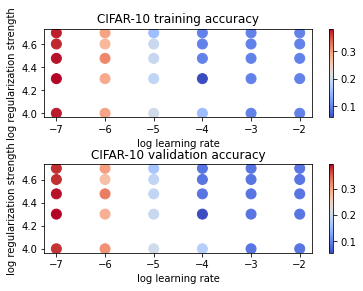

In [18]:
# Visualize the cross-validation results
import math
import pdb
import matplotlib.pyplot as plt

# pdb.set_trace()

x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.tight_layout(pad=3)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()